In [ ]:
import tensorflow as tf
!pip install opendatasets -q

In [ ]:
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ishararajapaksha
Your Kaggle Key: ··········


100%|██████████| 217M/217M [00:01<00:00, 152MB/s]


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [ ]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir  = "/content/cats-and-dogs-for-classification/cats_dogs/test"

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                        batch_size = BATCH_SIZE,
                                                        image_size =  IMAGE_SIZE,
                                                        subset = 'training',
                                                        validation_split = 0.1,
                                                        seed = 42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                        batch_size = BATCH_SIZE,
                                                        image_size =  IMAGE_SIZE,
                                                        subset = 'validation',
                                                        validation_split = 0.1,
                                                        seed = 42)

test_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                        batch_size = BATCH_SIZE,
                                                        image_size =  IMAGE_SIZE
                                                        )

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 8000 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
class_names


['cats', 'dogs']

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


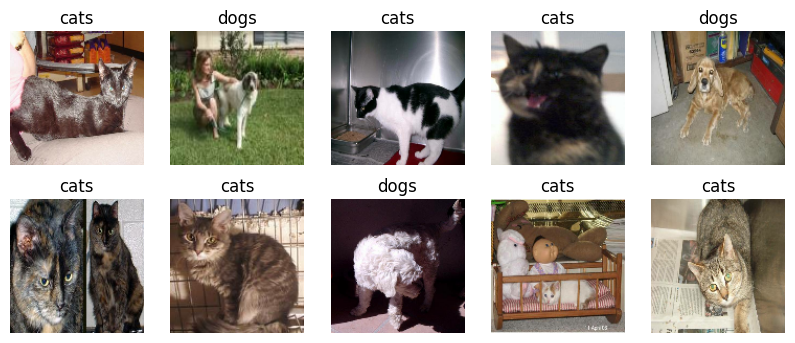

In [ ]:
# plot data sample
plt.figure(figsize=(10,4))
for image, label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')


In [ ]:
train_data = train_data.map(lambda x,y:(x/225,y))
validation_data = validation_data.map(lambda x,y:(x/225,y))
test_data = test_data.map(lambda x,y:(x/225,y))

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.44892308 0.4622564  0.48447862]
   [0.49366483 0.5009565  0.5080225 ]
   [0.5228235  0.51250464 0.5004176 ]
   ...
   [0.5771665  0.5907255  0.6054651 ]
   [0.56387776 0.59156877 0.60307914]
   [0.5728898  0.61774254 0.6219828 ]]

  [[0.37866795 0.39200127 0.4142235 ]
   [0.44165555 0.44352117 0.45239583]
   [0.5066794  0.502213   0.48910537]
   ...
   [0.51875925 0.536537   0.5498703 ]
   [0.5330618  0.56075275 0.5722632 ]
   [0.61686873 0.6536995  0.6619508 ]]

  [[0.4113021  0.4217882  0.4425868 ]
   [0.40700465 0.40882757 0.41771647]
   [0.4683728  0.46392837 0.45222697]
   ...
   [0.5366108  0.5578772  0.5712105 ]
   [0.5787309  0.6009531  0.6142864 ]
   [0.56589544 0.5971802  0.6074927 ]]

  ...

  [[0.52477795 0.54255575 0.55588907]
   [0.5405226  0.5583004  0.5716337 ]
   [0.58020455 0.5979823  0.61131567]
   ...
   [0.36230332 0.38676894 0.43004924]
   [0.20422797 0.22586629 0.24065335]
   [0.40487942 0.41898397 0.410477  ]]

  [[0.55625784 0.57403564 0.587368

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip('horizontal', input_shape=(128,128,3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

In [ ]:

model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))

model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)      

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
import time
start_time = time.time()

history = model.fit(train_data,
                    epochs = 20,
                    validation_data = validation_data

)
end_time = time.time()

Epoch 1/20
225/225 [==============================] - 18s 43ms/step - loss: 0.6781 - accuracy: 0.5917 - val_loss: 0.6909 - val_accuracy: 0.5188
Epoch 2/20
225/225 [==============================] - 11s 48ms/step - loss: 0.6419 - accuracy: 0.6290 - val_loss: 0.6462 - val_accuracy: 0.6513
Epoch 3/20
225/225 [==============================] - 9s 39ms/step - loss: 0.6259 - accuracy: 0.6503 - val_loss: 0.6215 - val_accuracy: 0.6538
Epoch 4/20
225/225 [==============================] - 9s 40ms/step - loss: 0.6077 - accuracy: 0.6662 - val_loss: 0.7099 - val_accuracy: 0.5562
Epoch 5/20
225/225 [==============================] - 10s 42ms/step - loss: 0.5979 - accuracy: 0.6729 - val_loss: 0.6314 - val_accuracy: 0.5962
Epoch 6/20
225/225 [==============================] - 10s 44ms/step - loss: 0.5854 - accuracy: 0.6867 - val_loss: 0.5855 - val_accuracy: 0.6862
Epoch 7/20
225/225 [==============================] - 10s 45ms/step - loss: 0.5685 - accuracy: 0.6976 - val_loss: 0.5492 - val_accuracy: 0

In [ ]:
history.history

{'loss': [0.6781160235404968,
  0.6419247984886169,
  0.6259390711784363,
  0.6076759099960327,
  0.5978511571884155,
  0.5854201316833496,
  0.5685029029846191,
  0.5653014183044434,
  0.5363755226135254,
  0.5253103375434875,
  0.5232330560684204,
  0.5107146501541138,
  0.49523457884788513,
  0.48322126269340515,
  0.4743123948574066,
  0.4641689658164978,
  0.4492267966270447,
  0.4456009864807129,
  0.43643584847450256,
  0.4288613200187683],
 'accuracy': [0.5916666388511658,
  0.629027783870697,
  0.6502777934074402,
  0.6662499904632568,
  0.6729166507720947,
  0.6866666674613953,
  0.6976388692855835,
  0.7030555605888367,
  0.7320833206176758,
  0.7333333492279053,
  0.7404166460037231,
  0.747083306312561,
  0.7594444155693054,
  0.7659721970558167,
  0.7756944298744202,
  0.7794444561004639,
  0.7881944179534912,
  0.7894444465637207,
  0.7979166507720947,
  0.8004166483879089],
 'val_loss': [0.6908656358718872,
  0.6462454795837402,
  0.6214939951896667,
  0.709852159023284

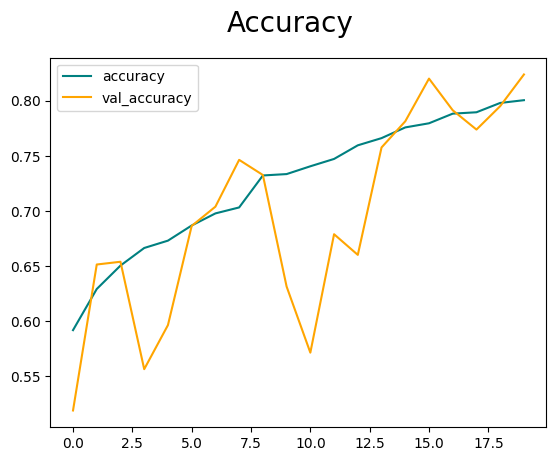

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend()
plt.show()

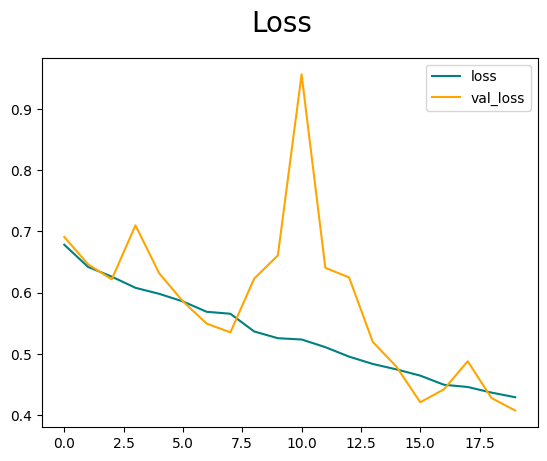

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)



1/1 [==============================] - 0s 20ms/step


In [ ]:
precision.result()


<tf.Tensor: shape=(), dtype=float32, numpy=0.807281>

In [ ]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.887>

In [ ]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.837625>

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

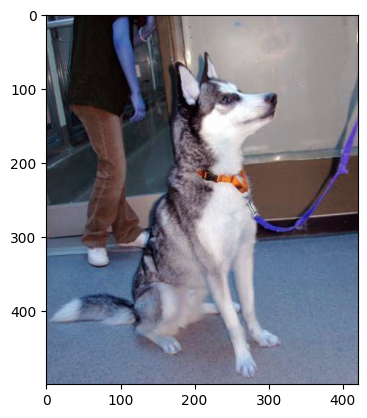

In [ ]:
image = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/dogs/dog.4001.jpg')
plt.imshow(image)
plt.show()

In [ ]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255

In [ ]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.24648719, 0.31810176, 0.3585123 ],
        [0.08592637, 0.11106843, 0.15576608],
        [0.0356279 , 0.04982503, 0.09611954],
        ...,
        [0.6072441 , 0.58763623, 0.58371466],
        [0.6044424 , 0.57817096, 0.5764706 ],
        [0.5770374 , 0.54566485, 0.54566485]],

       [[0.4303086 , 0.49249113, 0.50228876],
        [0.12266331, 0.1451817 , 0.17475292],
        [0.08608428, 0.0847822 , 0.1374678 ],
        ...,
        [0.6205931 , 0.6009852 , 0.59706366],
        [0.61457705, 0.5883056 , 0.58660525],
        [0.582692  , 0.5513195 , 0.5513195 ]],

       [[0.39226255, 0.5224709 , 0.6079746 ],
        [0.18462105, 0.29083478, 0.3956908 ],
        [0.28411457, 0.36942402, 0.5046488 ],
        ...,
        [0.62244177, 0.6028339 , 0.59891236],
        [0.61009014, 0.5838187 , 0.58211833],
        [0.59411603, 0.5627435 , 0.5627435 ]],

       ...,

       [[0.4023663 , 0.4768761 , 0.6062879 ],
        [0.39